In [1]:
import import_ipynb

In [2]:
import CSD_function

importing Jupyter notebook from CSD_function.ipynb


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, ntpath
import imageio

In [4]:
# Given the range of the rectangle
lenX = 200
lenY = 200

D = 0.75

deltaX = 0.1
deltaY = 0.1
deltaT = (deltaX*deltaY)**2/(deltaX**2 + deltaY**2)/2/D
D*deltaT

Kr = 0.03

In [5]:
# Given Initial values
maxIter = 500
K = np.full([lenX, lenY], Kr, dtype=np.float64)
Kt = np.zeros([lenX, lenY], dtype=np.float64)
R = np.zeros([lenX, lenY], dtype=np.float64)
Rt = np.zeros([lenX, lenY], dtype=np.float64)

In [6]:
center_point_loc = np.array([int(lenX/2),int(lenY/2)])

In [7]:
maxIter = 500
clamping_value=0.9
clamping_radius=3
clamping_ticks=20
clamping_ticks_end=100

foucs_loc=np.array([[int(lenX/2),int(lenY/2)],
                     [int(lenX/2)+3,int(lenY/2)+3]])

In [8]:
point_value_only_diff = CSD_function.Dirichlet_bd_only_diff(maxIter,
                             clamping_value, clamping_radius,
                             clamping_ticks, clamping_ticks_end,
                             foucs_loc,
                             K, Kt,
                             Kr, Kr, Kr, Kr)

100%|██████████| 500/500 [00:20<00:00, 23.86it/s]


In [9]:
point_value_only_diff.shape

(500, 2)

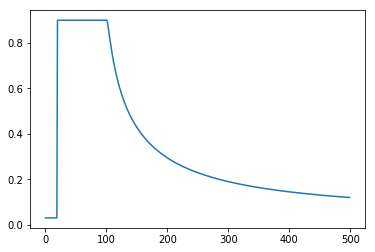

In [10]:
plt.plot( point_value_only_diff[:,0])

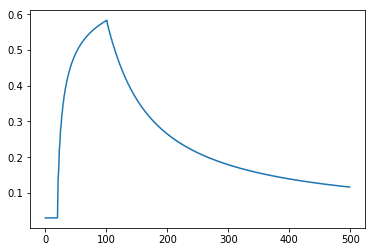

In [11]:
plt.plot( point_value_only_diff[:,1])

In [12]:
point_value_only_diff_noconv = CSD_function.Dirichlet_noconv_only_diff(maxIter,
                     clamping_value, clamping_radius,
                     clamping_ticks, clamping_ticks_end,
                     foucs_loc,
                     K)

  0%|          | 0/500 [00:00<?, ?it/s]CSD_function.ipynb:5: RuntimeWarning: invalid value encountered in subtract
  "execution_count": 1,
CSD_function.ipynb:5: RuntimeWarning: overflow encountered in true_divide
  "execution_count": 1,
100%|██████████| 500/500 [00:04<00:00, 106.33it/s]


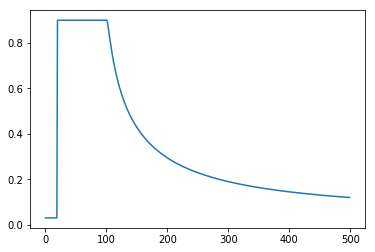

In [13]:
plt.plot( point_value_only_diff_noconv[:,0])

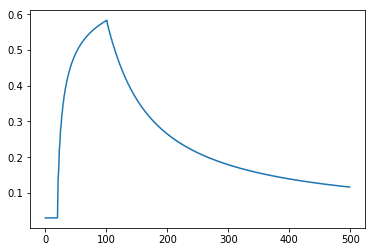

In [14]:
plt.plot( point_value_only_diff_noconv[:,1])

In [15]:
point_value_with_fK = CSD_function.Dirichlet_bd_with_fK(maxIter,
                             clamping_value, clamping_radius,
                             clamping_ticks, clamping_ticks_end,
                             foucs_loc,
                             K, Kt,
                             Kr, Kr, Kr, Kr)

100%|██████████| 500/500 [00:20<00:00, 23.82it/s] 


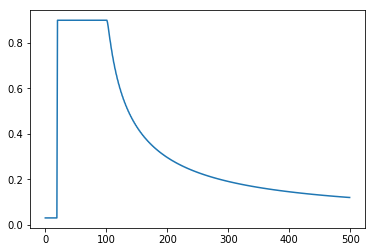

In [16]:
plt.plot( point_value_with_fK[:,0])

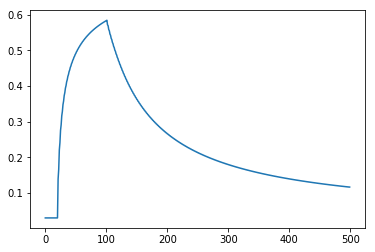

In [17]:
plt.plot( point_value_with_fK[:,1])

In [18]:
point_value_with_fK_noconv = CSD_function.Dirichlet_noconv_with_fK(maxIter,
                     clamping_value, clamping_radius,
                     clamping_ticks, clamping_ticks_end,
                     foucs_loc,
                     K)

100%|██████████| 500/500 [00:05<00:00, 86.90it/s] 


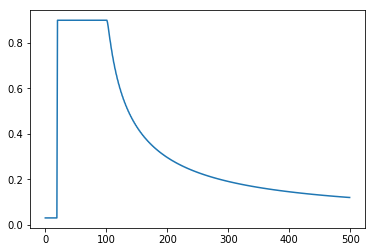

In [19]:
plt.plot( point_value_with_fK_noconv[:,0])

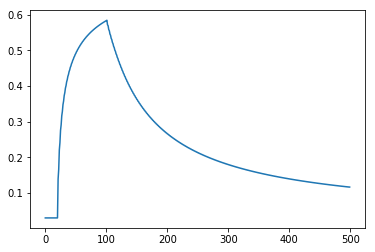

In [20]:
plt.plot( point_value_with_fK_noconv[:,1])

In [12]:
# Diri, Neum, Perid
point_value, R_value = CSD_function.compute_fick_law('Diri', maxIter,
                     clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
                     foucs_loc, K, Kt, R, Rt, 
                     Kr, Kr, Kr, Kr)

# point_value, R_value = CSD_function.compute_fick_law('Neum', maxIter,
#                      clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
#                      foucs_loc, K, Kt, R, Rt, 
#                      Kr, Kr, Kr, Kr)

# point_value, R_value = CSD_function.compute_fick_law('Perid', maxIter,
#                      clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
#                      foucs_loc, K, Kt, R, Rt)

  4%|▍         | 20/500 [00:03<01:21,  5.89it/s]/Users/liyuezhou/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 500/500 [01:46<00:00,  6.55it/s]


In [13]:
point_value.shape

(500, 2)

In [14]:
K_R_value = np.zeros((maxIter,foucs_loc.shape[0],2))
K_R_value[:,:,0] = point_value
K_R_value[:,:,1] = R_value

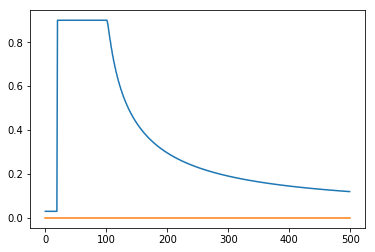

In [15]:
plt.plot( K_R_value[:,0,:])

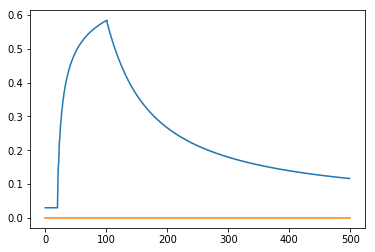

In [16]:
plt.plot( K_R_value[:,1,:])

In [8]:
noconv_point_value, noconv_R_value = CSD_function.Dirichlet_noconv( maxIter,
                                                       clamping_value, clamping_radius,
                                                       clamping_ticks, clamping_ticks_end,
                                                       foucs_loc,
                                                       K, R)

100%|██████████| 500/500 [00:05<00:00, 99.80it/s] 


In [9]:
noconv_K_R_value = np.zeros((maxIter,foucs_loc.shape[0],2))
noconv_K_R_value[:,:,0] = noconv_point_value
noconv_K_R_value[:,:,1] = noconv_R_value

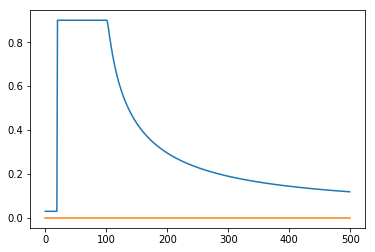

In [10]:
plt.plot( noconv_K_R_value[:,0,:])

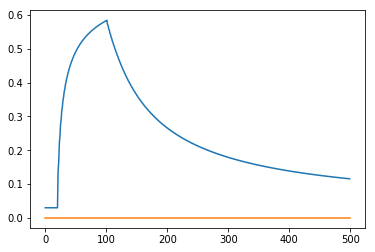

In [11]:
plt.plot( noconv_K_R_value[:,1,:])

In [17]:
# load all timesteps images
images = []
for image in sorted(glob.glob('../images/Diri/*.png'), key=lambda k: int(ntpath.basename(k).replace('.png', ''))):
    images.append(imageio.imread(image))

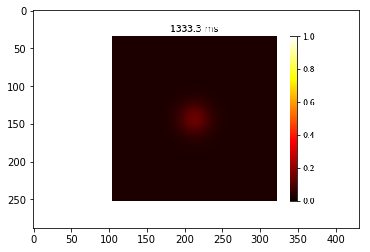

In [18]:
plt.imshow(images[400])

In [12]:
image_folder = '../images/Diri'
video_name = '../vedio/Diffusion_test.mp4'

images = []
for i in range(maxIter):
    images.append( str(int(i)) + ".png")

CSD_function.make_video(images, image_folder, video_name, outimg=None, fps=int(1/deltaT), size=None, is_color=True, format="XVID")

<VideoWriter 0x11550c430>